In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import matplotlib.collections as mcoll
import matplotlib.cm as cm


# Load an audio file
# y, sr = librosa.load('./data/balrag.wav')
y, sr = librosa.load('./data/balrag_alt.wav')


sample_rate = sr
audio = y


In [2]:

# Extract features
mfccs = librosa.feature.mfcc(y=y, sr=sr)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
chromagram = chroma
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)

time = librosa.frames_to_time(range(len(spectral_centroids[0])), sr=sample_rate)

# Print extracted features for a glimpse
print("MFCCs:", mfccs.shape)
print("Chroma:", chroma.shape)
print("Tempo:", tempo, "Beats:", beats.shape)
print("Spectral Centroids:", spectral_centroids.shape)

MFCCs: (20, 3704)
Chroma: (12, 3704)
Tempo: 123.046875 Beats: (174,)
Spectral Centroids: (1, 3704)


In [3]:
def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=2, alpha=1.0):
    """
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    
    # Create a path, a collection of line segments and add it to the current axes
    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format for LineCollection
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

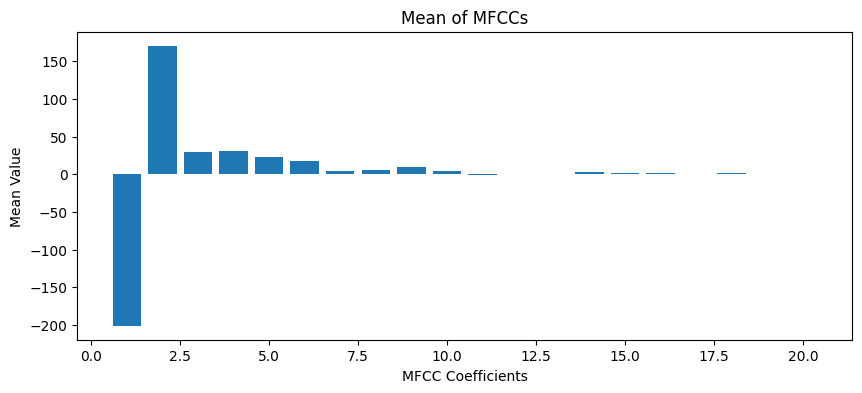

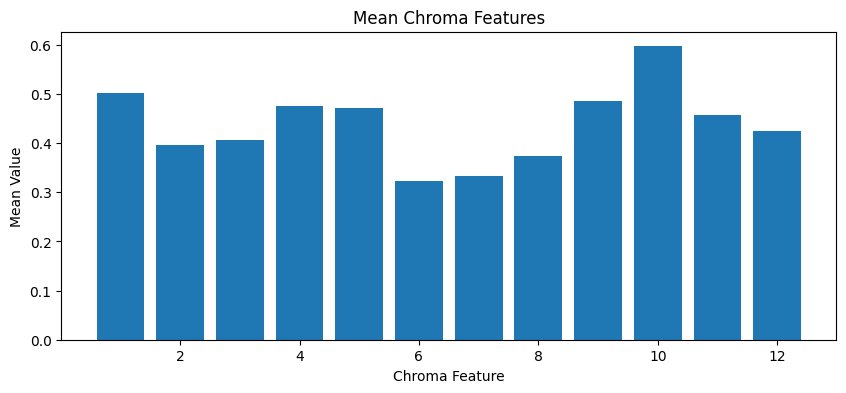

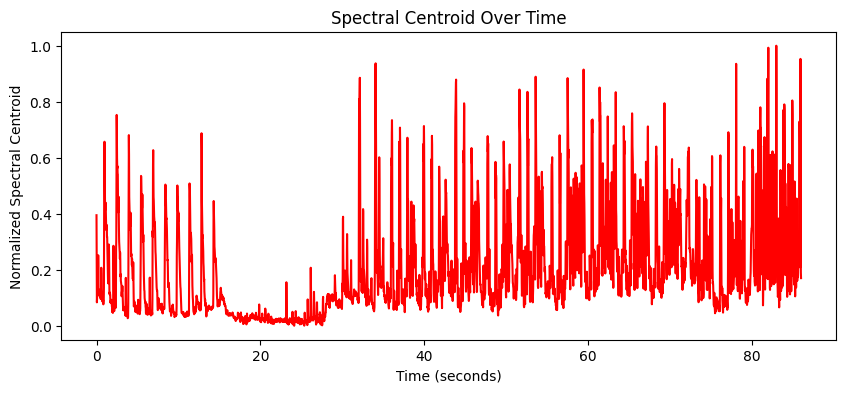

In [4]:
# Basic Analysis of Features

## MFCCs Analysis
# Calculate the mean of each MFCC
mfccs_mean = np.mean(mfccs, axis=1)
# Plot the mean of MFCCs
plt.figure(figsize=(10, 4))
plt.bar(range(1, 1 + len(mfccs_mean)), mfccs_mean)
plt.title('Mean of MFCCs')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.show()

## Chroma Features Analysis
# Calculate the mean of the Chromagram over time
chroma_mean = np.mean(chromagram, axis=1)
# Plot the mean Chroma Features
plt.figure(figsize=(10, 4))
plt.bar(range(1, 1 + len(chroma_mean)), chroma_mean)
plt.title('Mean Chroma Features')
plt.xlabel('Chroma Feature')
plt.ylabel('Mean Value')
plt.show()

## Spectral Centroids Analysis
# Normalize the spectral centroids for visualization
# normalized_spectral_centroids = librosa.util.normalize(spectral_centroids)
normalized_spectral_centroids = (spectral_centroids - np.min(spectral_centroids)) / (np.max(spectral_centroids) - np.min(spectral_centroids))
# normalized_spectral_centroids = spectral_centroids
# Plot the Spectral Centroid over time
frames = range(len(spectral_centroids[0]))
time = librosa.frames_to_time(frames, sr=sample_rate)
plt.figure(figsize=(10, 4))
plt.plot(time, normalized_spectral_centroids[0], color='r')
plt.title('Spectral Centroid Over Time')
plt.ylabel('Normalized Spectral Centroid')
plt.xlabel('Time (seconds)')
plt.show()

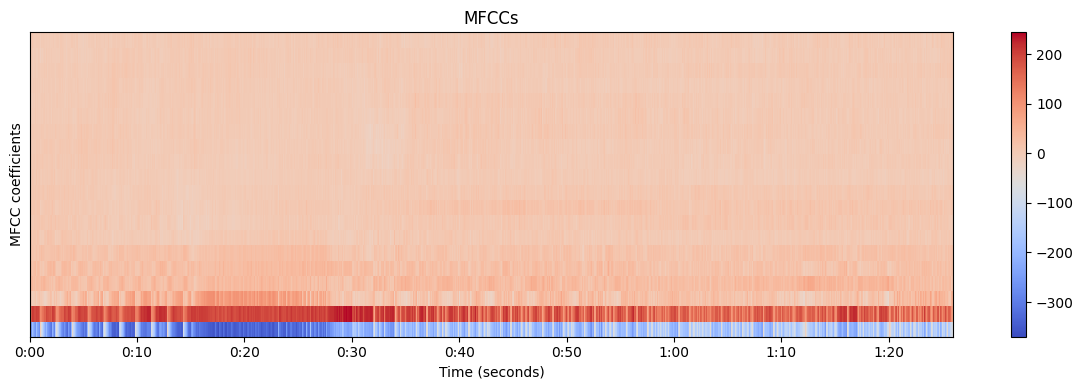

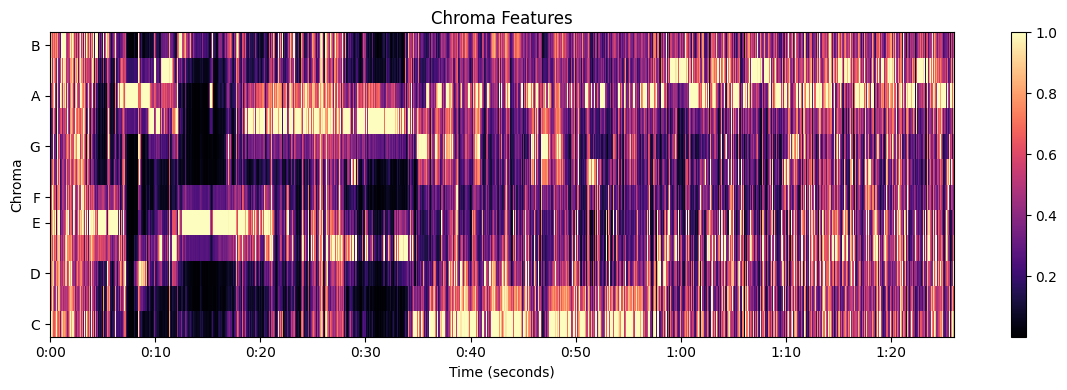

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

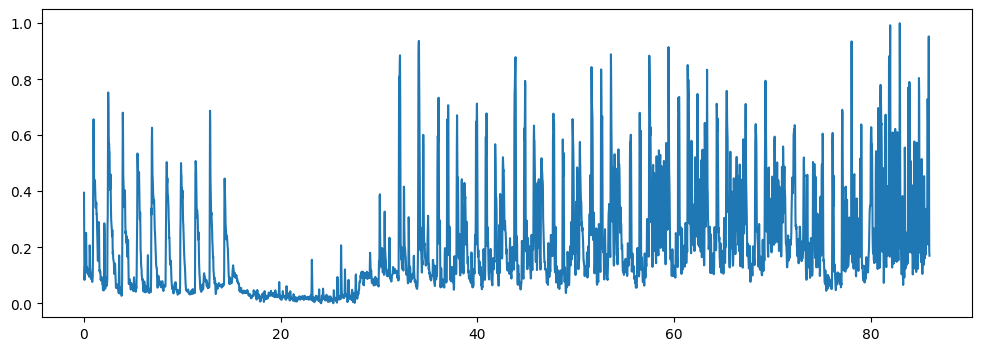

In [5]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.ylabel('MFCC coefficients')
plt.xlabel('Time (seconds)')
plt.show()

plt.figure(figsize=(12, 4))
librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.ylabel('Chroma')
plt.xlabel('Time (seconds)')
plt.show()

# Normalize the spectral centroids for visualization
# normalized_spectral_centroids = librosa.normalize(spectral_centroids)

# Plot the Spectral Centroid over time
plt.figure(figsize=(12, 4))
plt.plot(time, normalized_spectral_centroids[0]) #, color='r')
plt.colorbar()
plt.title('Spectral Centroid Over Time')
plt.ylabel('Normalized Spectral Centroid')
plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()

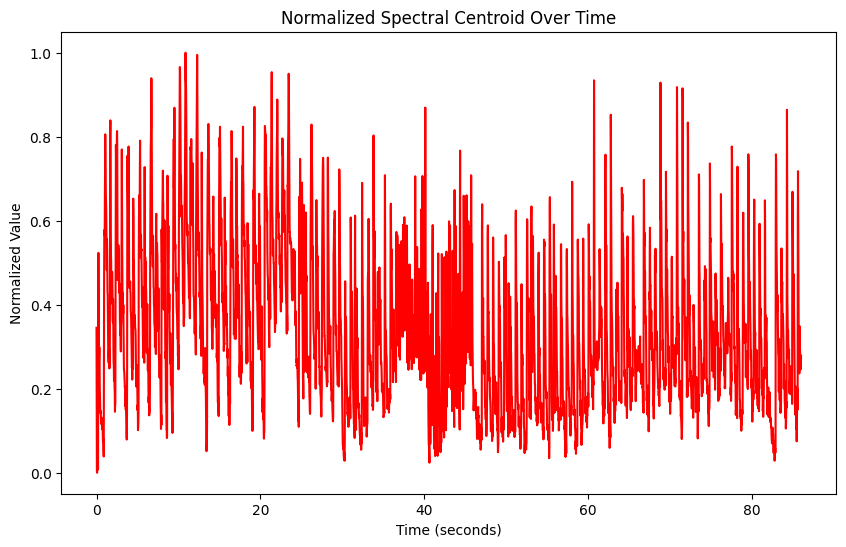

In [ ]:
normalized_spectral_centroids = (spectral_centroids - np.min(spectral_centroids)) / (np.max(spectral_centroids) - np.min(spectral_centroids))

frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(10, 6))
plt.plot(t, normalized_spectral_centroids[0], color='r')  # Ensure you're plotting the normalized values
plt.title('Normalized Spectral Centroid Over Time')
plt.ylabel('Normalized Value')
plt.xlabel('Time (seconds)')
plt.show()